In [1]:
from __future__ import division
from utils import *
from functions import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)



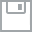
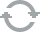
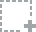
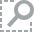
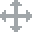
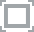
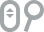
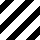
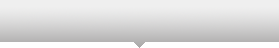
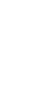
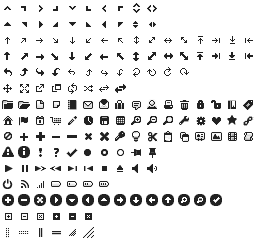
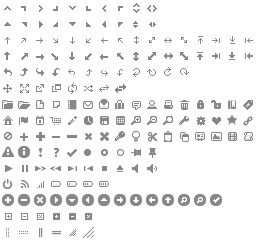
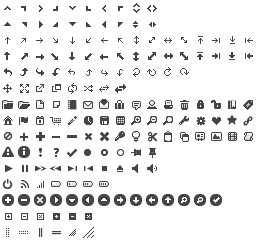
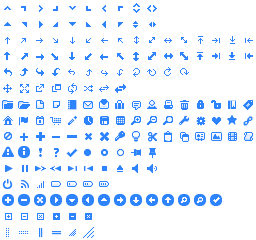
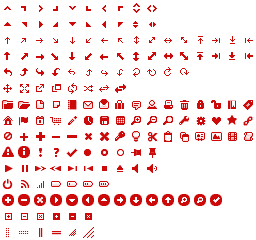
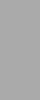
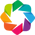
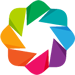

In [2]:
from bokeh.io import output_notebook
output_notebook()

In [3]:
# Instantiate classes
cortex = Cortex()
trn = TRN()

In [4]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
# N = 500
# G = 8.1
# d1 = 10
# d2 = 80000
# d3 = 10
# before = d1
# after = d2+d3
# S = 150
# sigma = 60
# WII = 1400
# LTP = 0.1
# LTD = 7

# Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, WII, LTP, LTD) for LTP in np.linspace(0,0.5,56))

In [4]:
#-------------------------------
# PARAMS SEARCH
#-------------------------------
N = 500
G = 8.1
d1 = 10
d2 = 80000
d3 = 10
before = d1
after = d2+d3
S = 150
sigma = 60
WII = 1400
LTP = 0.1
LTD = 7

data = Parallel(n_jobs=8)(delayed(cortex.readSimulation)(N, 0, G, S, d1, d2, d3, before, after, WII, LTP, LTD) for LTP in np.linspace(0,0.5,56))


can' find:	 /Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/gamma_g-8.1_TImean-50_T-80020_Glob-1_dt-0.25_N-500_S-150_WII-1400_LTD-7_LTP-0_0.txt


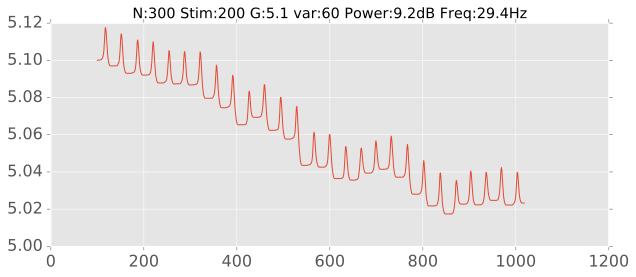

In [20]:
N = 300
G = 5.1
d1 = 10
d2 = 1000
d3 = 10
before = d1
after = d2+d3
S = 200
sigma = 60
WII = 1400
LTP = 0.01
LTD = 0.001


cortex.runSimulation(N,0, G, S, d1, d2, d3, before, after, sigma, WII, LTP, LTD)
spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation,p,q,lowsp,vm = cortex.readSimulation(N, 0, G, S, d1, d2, d3, before, after, WII, LTP, LTD)
P = fourier(ssp1)
titlestr = 'N:%d Stim:%d G:%.1f var:%d Power:%.1fdB Freq:%.1fHz' %(N, S, G, sigma, P[1], P[0])
# np.save(DIRECTORY + 'gamma-%d' %i)
plt.plot(gamma)
# plt.figure()
# plt.plot(vm)
plt.title(titlestr)
# plt.legend()
plotRasterGPU(spikes_x[:],spikes_y[:], titlestr)

In [6]:
print(data)
np.mean(gamma[500:])

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


NameError: name 'gamma' is not defined

In [30]:
# plt.scatter(spikes_x[:10000], spikes_y[:10000], marker='|')
# plt.scatter(spikes_x[:10000], spikes_y[:10000], marker='.')
# plt.ylim([498,500])
plotRasterGPU(spikes_x[:],spikes_y[:], titlestr)

ValueError: v cannot be empty

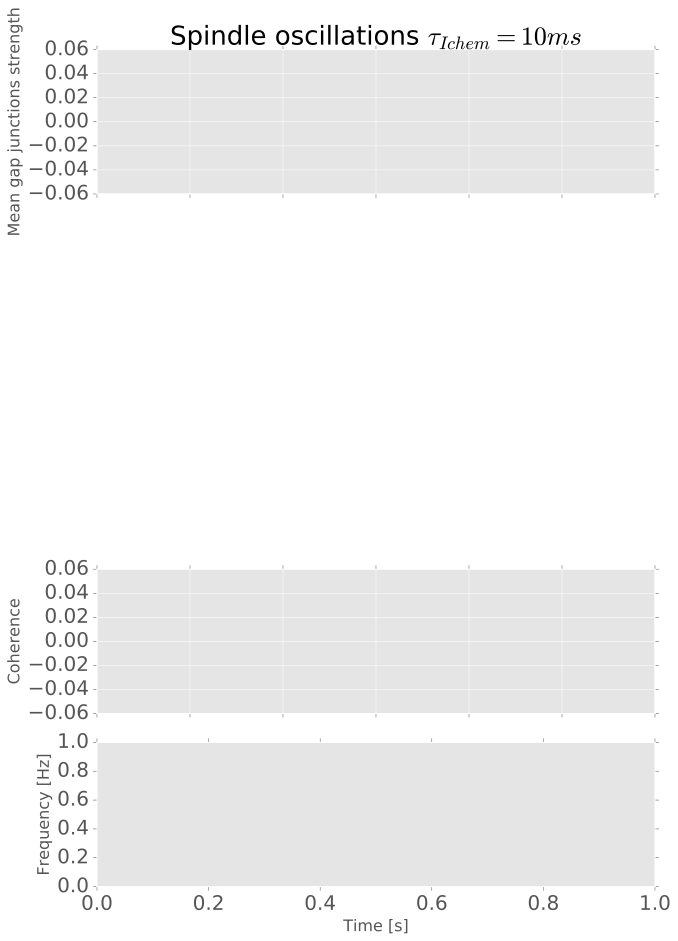

In [2]:
N = 100
G = 4.1
d1 = 10
d2 = 10000
d3 = 10
before = d1
after = d2+d3
S = 70
sigma = 60
WII = 1550
tq = 4000
thq = 0.30
# plt.xkcd()
runSimulation(N,0, G, S, d1, d2, d3, before, after, sigma, WII, tq, thq)
spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation,p,q,lowsp,vm = readSimulation(N, 0, G, S, d1, d2, d3, before, after, WII)
P = fourier(ssp1)
titlestr = 'N:%d Stim:%d G:%.1f var:%d Power:%.1fdB Freq:%.1fHz' %(N, S, G, sigma, P[1], P[0])

'''
PLOTS
'''
start = 250
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(511) 
ax.plot(gamma[start:])
ax.set_xticklabels([])
ax.set_ylabel('Mean gap junctions strength', fontsize=16)
plt.title(r'Spindle oscillations $\tau_{Ichem} = 10ms$', fontsize=26)
# plt.savefig(DIRECTORY + 's-%d_t-%d_gamma.pdf'%(S, d2))
ax1 = fig.add_subplot(514)
ax1.plot(correlation[start:]*150)
ax1.set_xticklabels([])
ax1.set_ylabel('Coherence', fontsize=16)
ax2 = fig.add_subplot(515)
dt = 0.00025
# x = [np.sin(2*i) + np.sin(i) + 5*np.random.rand()+np.sin(3*i) for i in np.arange(0,40000)]
NFFT = 6000      # the length of the windowing segments
Fs = 1/dt  # the sampling frequency

# ax1 = plt.subplot(211)
# plt.plot(t, x)
ax2.grid(False)
ax2.set_ylabel('Frequency [Hz]', fontsize=16)
ax2.set_xlabel('Time [s]', fontsize=16)
Pxx, freqs, bins, im = plt.specgram(movingaverage(ssp1[start*4*80:],1),pad_to=12000, NFFT=NFFT, Fs=Fs, noverlap=5000 )#cmap=plt.cm.gist_heat)
ax2.set_ylim([2,30])
plt.tight_layout()

ax3 = fig.add_subplot(512)
ax3.set_ylabel('Low Field Potential (mV)', fontsize=16)
ax3.set_xticks([i*100*4*80 for i in range(9)])
ax3.set_xlim([0,255000])
ax3.set_xticklabels([])
ax3.plot(movingaverage(vm[start*4*80:],4000))


ax4 = fig.add_subplot(513)
ax4.plot(movingaverage(p[start*4*80:],1000)*N, label='p')
ax4.set_xticks([i*100*4*80 for i in range(9)])
ax4.set_xticklabels([])
ax4.set_ylabel('PSTH', fontsize=16)
# ax3.set_ylim([2,30])
plt.tight_layout()
plt.savefig(DIRECTORY + 'Waxing-and-waning_70_%d_t-%d.pdf' %(N,10))
plt.show()
# 

In [2]:
N = 500
G = 4.1
d1 = 10
d2 = 80000
d3 = 10
before = d1
after = d2+d3
S = 70
sigma = 60
WII = 1550
tq = 4000
thq = 0.30
# plt.xkcd()

# run simulation for 0+50 to 150+50
# Parallel(n_jobs=8)(delayed(runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, WII, tq, thq) for S in np.arange(-20,150,10)) #runSimulation(N,0, G, S, d1, d2, d3, before, after, sigma, WII, tq, thq)
data = Parallel(n_jobs=8)(delayed(readSimulation)(N, 0, G, S, d1, d2, d3, before, after, WII) for S in np.arange(-20,150,10))
#spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation,p,q,lowsp,vm = readSimulation(N, 0, G, S, d1, d2, d3, before, after, WII)


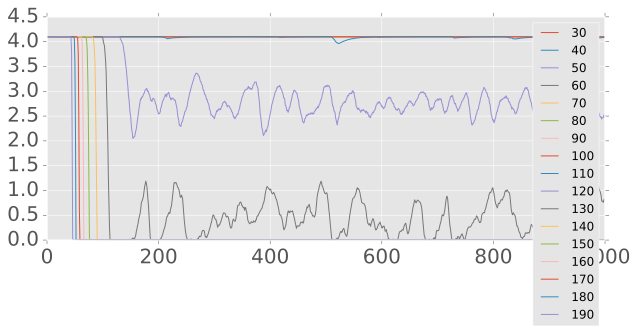

In [4]:
for i,gg in enumerate(g):
    plt.plot(gg, label='%d'%(30+i*10))
plt.legend()

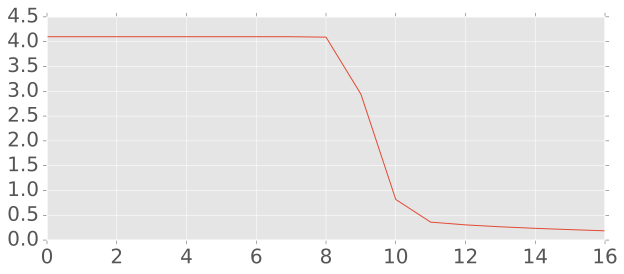

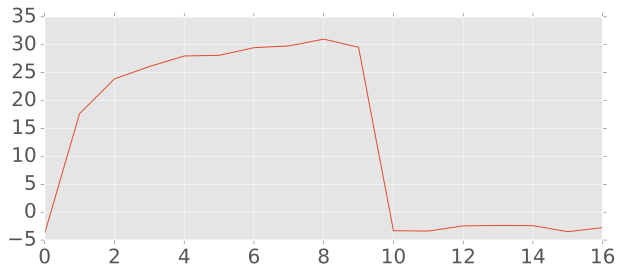

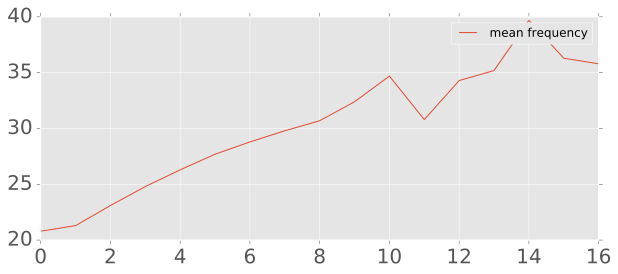

In [3]:
g=[]
power = []
freq = []
for exp in data:
    g.append(exp[4][1:])
    power.append(fourier(exp[6][10:])[1])
    freq.append(fourier(exp[6][10:])[0])
plt.plot(np.mean(g, axis=1), label="mean gap junction strength")
plt.figure()
plt.plot(power, label="mean power")
plt.figure()
plt.plot(freq, label="mean frequency")
plt.legend()


In [88]:
# plotRasterGPU(spikes_x[-200000:],spikes_y[-200000:], titlestr)
plotRasterGPU(data[8][0][-200000:],data[8][1][-200000:], titlestr)

In [4]:
# plt.plot(movingaverage(ssp1[-30000:],1000))
# plt.plot(correlation[250:])
# psth = movingaverage(p[start*6*80:8.2*start*80:],100)*N
plt.plot(np.arange(0, 45/4,45/4/len(psth)),psth ,label='p')
plt.title('PSTH: 2 spindles')
plt.xlabel('Time [s]')
plt.tight_layout()
plt.savefig(DIRECTORY + '2spindles.pdf')
# plt.plot(q, label='q')
# plt.figure()
# plt.plot(lowsp)

NameError: name 'psth' is not defined

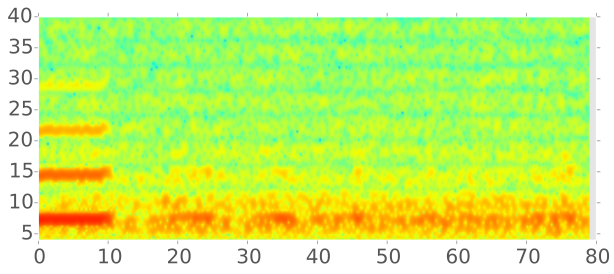

In [200]:
dt = 0.00025


# x = [np.sin(2*i) + np.sin(i) + 5*np.random.rand()+np.sin(3*i) for i in np.arange(0,40000)]
NFFT = 6000      # the length of the windowing segments
Fs = 1/dt  # the sampling frequency

# ax1 = plt.subplot(211)
# plt.plot(t, x)
ax = plt.subplot(111)
ax.grid(False)
Pxx, freqs, bins, im = plt.specgram(movingaverage(ssp1[:],1000), NFFT=NFFT, Fs=Fs, noverlap = 5000, pad_to=12000,
                             detrend='none'   )
ax.set_ylim([4,40])
plt.show()

In [3]:
res=[]
for G in np.arange(0.1,4.1):
    for sigma in range(0,75,5):
#         for S in np.arange(0,70,10):
        for WII in range(1200,1700,50):
            Parallel(n_jobs=num_cores)(delayed(runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, WII) for S in np.arange(0,170,10))
            for S in np.arange(0,170,10):
                spikes_x, spikes_y, spikes_x_tc, spikes_y_tc, gamma, correlation, ssp1, stimulation = readSimulation(N, 0, G, S, d1, d2, d3, before, after, WII)
                four = fourier(ssp1)
                res.append([G,sigma, S, WII, four[0], four[1]])

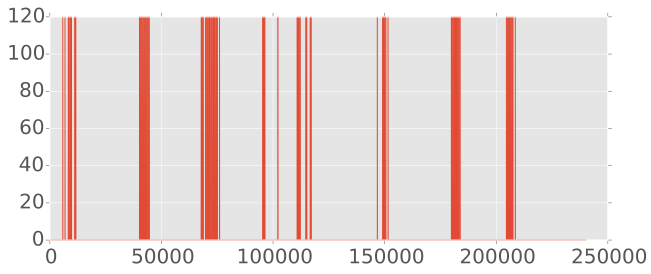

In [41]:
coeff = -300
Rm = 0.5

ron = readoutSpikes(ssp1[start*4*80:],Rm, coeff)
plt.plot(ron*120)

In [5]:
res = np.load(DIRECTORY + '_res5.npy')
# res_ = np.load(DIRECTORY + '_res2.npy')
# RES = np.concatenate((res,res_))
# print RES
# # print RES
df = pd.DataFrame(res, columns=['gamma','sigma','stim','WII','freq','power'])

In [17]:
df_sliced = df[(df['gamma']==0.1) & (df['freq']<100)]
print df_sliced

      gamma  sigma  stim   WII       freq      power
4       0.1      0    40   500  69.254565   6.916427
5       0.1      0    50   500  36.124139   8.067109
28      0.1      0   110  1000  73.445764   8.002118
29      0.1      0   120  1000  39.317433  13.093745
36      0.1      0    20  1400  94.800918   9.967917
43      0.1      0    90  1400   8.382397  14.451294
51      0.1      0     0  1800   3.792037   9.091247
52      0.1      0    10  1800   4.590360  12.073577
53      0.1      0    20  1800   5.388684  13.640340
57      0.1      0    60  1800   6.586169  16.015729
59      0.1      0    80  1800   7.384493  17.456889
60      0.1      0    90  1800   7.584073  17.296998
64      0.1      0   130  1800   8.182816  19.147351
65      0.1      0   140  1800   7.983235  18.967465
66      0.1      0   150  1800   7.783654  18.512923
68      0.1      0     0  2200   3.592456  12.658889
69      0.1      0    10  2200   4.390779  14.678471
70      0.1      0    20  2200   4.789941  16.

In [38]:
def plotPower(ax = None, gamma = 0, df_sliced = None):
    if df_sliced is None:
        df_sliced = df[(df['gamma']==gamma) & (df['freq']<100)]
    if ax == None:
        # Create a figure of given size
        fig = plt.figure(figsize=(6,4))
        # Add a subplot
        ax = fig.add_subplot(111)
    # Set title
    ttl = r'Power dB $\gamma = %d$' % gamma
    # Set color transparency (0: transparent; 1: solid)
    a = 1
    # Create a colormap
    customcmap = [(x/24.0,  x/48.0, 0.05) for x in range(len(df))]

    df_sliced.plot(kind="hexbin",  
                   y='stim', x='sigma', C='power',gridsize=20, ax=ax, alpha=a, legend=False, colormap=cx4,
                          # edgecolor='w', 
            title=ttl)
    ax.set_title(ttl, y=1.03)

    # Customize title, set position, allow space on top of plot for title
    # ax.set_title(ax.get_title(), fontsize=36, alpha=a)
    ax.title.set_fontsize(36)
    plt.subplots_adjust(top=0.9)
    # ax.title.set_position((0,1.08))

    # Set x axis label on top of plot, set label text
    ax.xaxis.set_label_position('bottom')
    # xlab = r'$\gamma_C$'
    # # ylab = r'$\nu_{EI}$'
    # ax.set_xlabel(xlab, fontsize=30, alpha=a)
    # ax.set_ylabel(ylab, fontsize=30, alpha=a)
    ax.set_xticklabels(ax.get_xticks(), fontsize=20, alpha=a)
    ax.set_yticklabels(ax.get_yticks(), fontsize=20, alpha=a)
    # ax.xaxis.set_label_coords(0, 1.04)
    return ax

def plotPowerGamma(ax = None, gamma = 0, df_sliced = None, WII=1400):
    if df_sliced is None:
        df_sliced = df[(df['gamma']==gamma) & (df['freq']<100)]
    if ax == None:
        # Create a figure of given size
        fig = plt.figure(figsize=(6,4))
        # Add a subplot
        ax = fig.add_subplot(111)
    # Set title
    ttl = r'Power dB $W_{II}=%d$'%WII
    # Set color transparency (0: transparent; 1: solid)
    a = 1
    # Create a colormap
    customcmap = [(x/24.0,  x/48.0, 0.05) for x in range(len(df))]

    df_sliced.plot(kind="hexbin",  
                   y='stim', x='sigma', C='gamma',gridsize=20, ax=ax, alpha=a, legend=False, colormap=cx4,
                          # edgecolor='w', 
            title=ttl)
    ax.set_title(ttl, y=1.03)

    # Customize title, set position, allow space on top of plot for title
    # ax.set_title(ax.get_title(), fontsize=36, alpha=a)
    ax.title.set_fontsize(36)
    plt.subplots_adjust(top=0.9)
    # ax.title.set_position((0,1.08))

    # Set x axis label on top of plot, set label text
    ax.xaxis.set_label_position('bottom')
    # xlab = r'$\gamma_C$'
    # # ylab = r'$\nu_{EI}$'
    # ax.set_xlabel(xlab, fontsize=30, alpha=a)
    # ax.set_ylabel(ylab, fontsize=30, alpha=a)
    ax.set_xticklabels(ax.get_xticks(), fontsize=20, alpha=a)
    ax.set_yticklabels(ax.get_yticks(), fontsize=20, alpha=a)
    # ax.xaxis.set_label_coords(0, 1.04)
    return ax



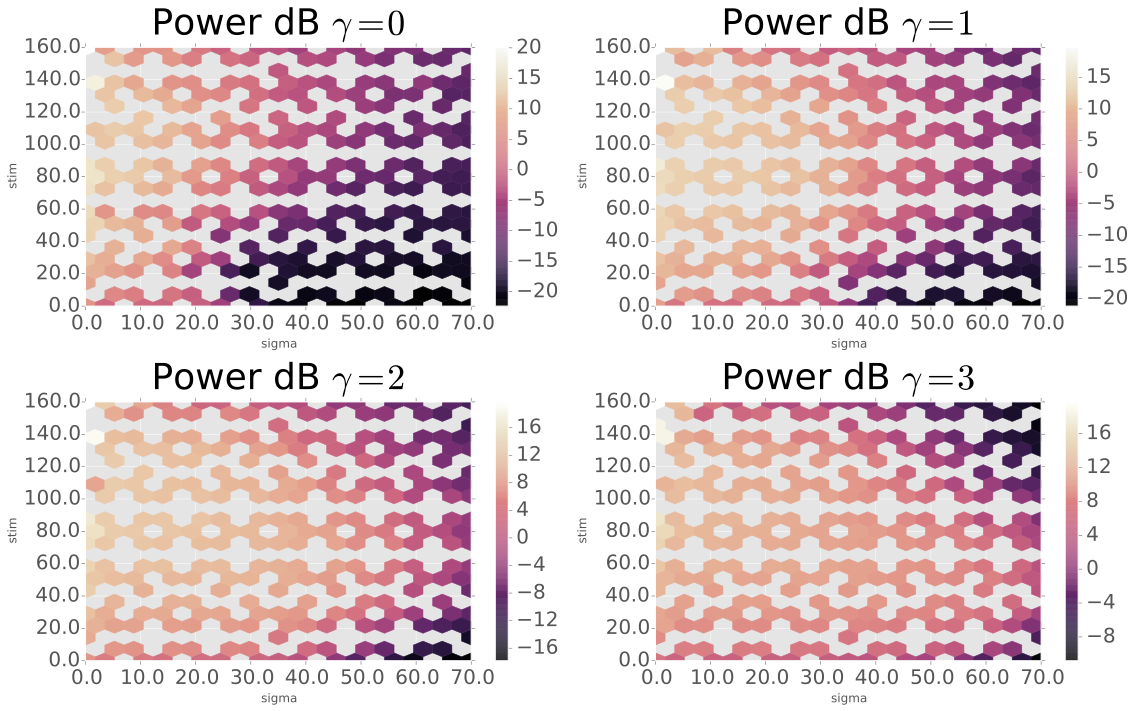

In [39]:
# Create a figure of given size
fig = plt.figure(figsize=(16,10))
# Add a subplot
for i in range(4):
    ax = fig.add_subplot(221 + i)
    plotPower(ax, i+0.1)
    
fig.tight_layout()
fig.savefig(DIRECTORY + '_res5.pdf')


In [40]:
def getData(df, WII = 1400):
    df_sliced1 = df[((df['WII']==WII) & (df['stim'] >= 100) & (df['gamma']<=1.1) & (df['freq']<200) & (df['power']>2))]
    # print df_sliced1
    df_sliced2 = df[((df['WII']==WII) & (df['stim'] <= 70) & (df['gamma']>=1) & (df['freq']<200) & (df['power']<-2))]
    # print df_sliced2
    res2 = pd.concat([df_sliced1, df_sliced2], axis=0, join='inner')
    # print res2
    return res2

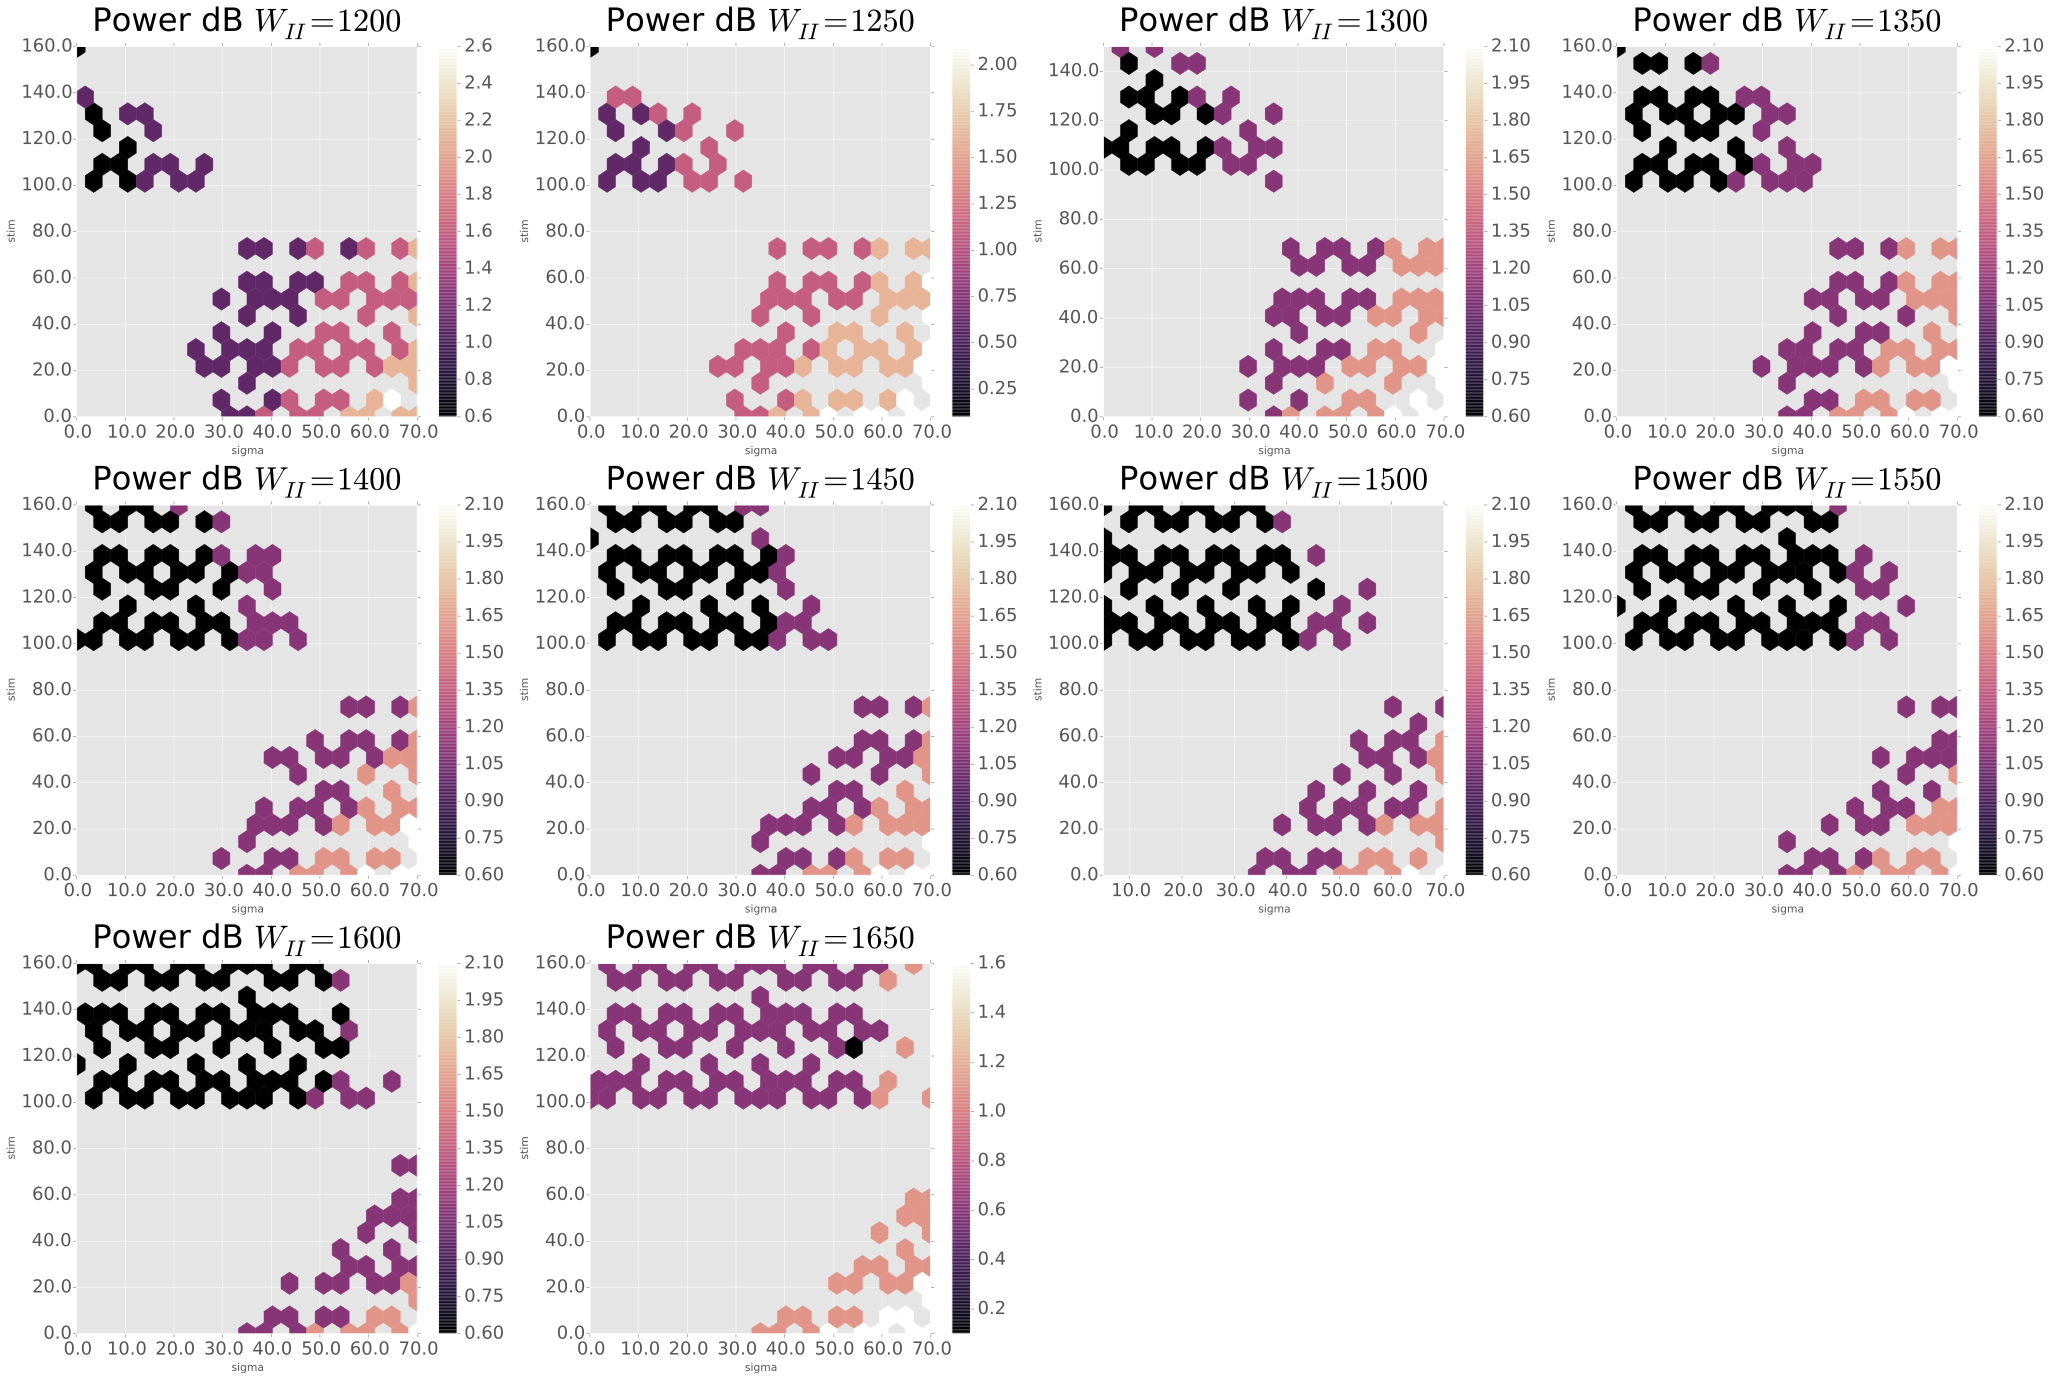

In [41]:
wlist = range(1200,1700,50)
fig = plt.figure(figsize = (32,28))
for i,WII in enumerate(wlist):
    
    ax = fig.add_subplot(4,4,1+i)
    plotPowerGamma(ax = ax, df_sliced = getData(df, WII), WII=WII)
plt.tight_layout()
plt.savefig(DIRECTORY + '_joinedG%d.pdf'%WII)

In [19]:
# df_sliced == None

In [90]:
a = np.arange(0,10)

In [91]:
a[-3:]

array([7, 8, 9])

In [6]:
a = range(10)

In [9]:
def dup(n):
  for i in range(n):
      yield from [i, i]

In [15]:
@coroutine
def fetch(host, port):
  r,w = yield from open_connection(host,port)
  w.write(b'GET /HTTP/1.0\r\n\r\n ')
  while (yield from r.readline()).decode('latin-1').strip():
      pass
  body=yield from r.read()
  return body

@coroutine
def start():
  data = yield from fetch('python.org', 80)
  print(data.decode('utf-8'))

NameError: name 'coroutine' is not defined